In [38]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

import joblib


In [39]:
data = pd.read_csv(r"C:\Users\Srini\OneDrive\Desktop\IBM_\adult 3.csv")
# Load dataset

# Use only selected features
selected_features = ['age', 'education', 'occupation', 'workclass', 'marital-status', 'gender', 'hours-per-week', 'income']
data = data[selected_features]



In [40]:
categorical_cols = ['education', 'occupation', 'workclass', 'marital-status', 'gender', 'income']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le


In [41]:
X = data.drop('income', axis=1)
y = data['income']

feature_names = X.columns


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    print(f"\nModel: {name}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
results_df



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7479
           1       0.46      0.17      0.25      2290

    accuracy                           0.76      9769
   macro avg       0.62      0.56      0.55      9769
weighted avg       0.71      0.76      0.71      9769


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7479
           1       0.64      0.57      0.60      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.74      9769
weighted avg       0.82      0.82      0.82      9769


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      7479
           1       0.56      0.53      0.55      2290

    accuracy                           0.

,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.8235,0.6376,0.5725,0.6033
4,KNN,0.8000,0.5748,0.5638,0.5692
2,Decision Tree,0.7936,0.5634,0.5314,0.5470
0,Logistic Regression,0.7589,0.4617,0.1712,0.2498
3,SVM,0.7664,0.6538,0.0074,0.0147


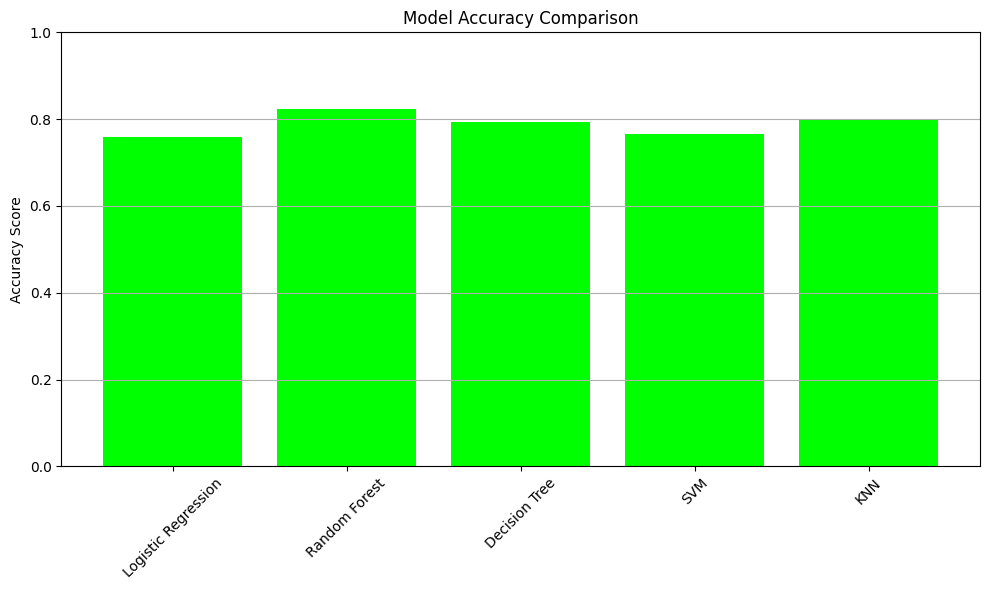

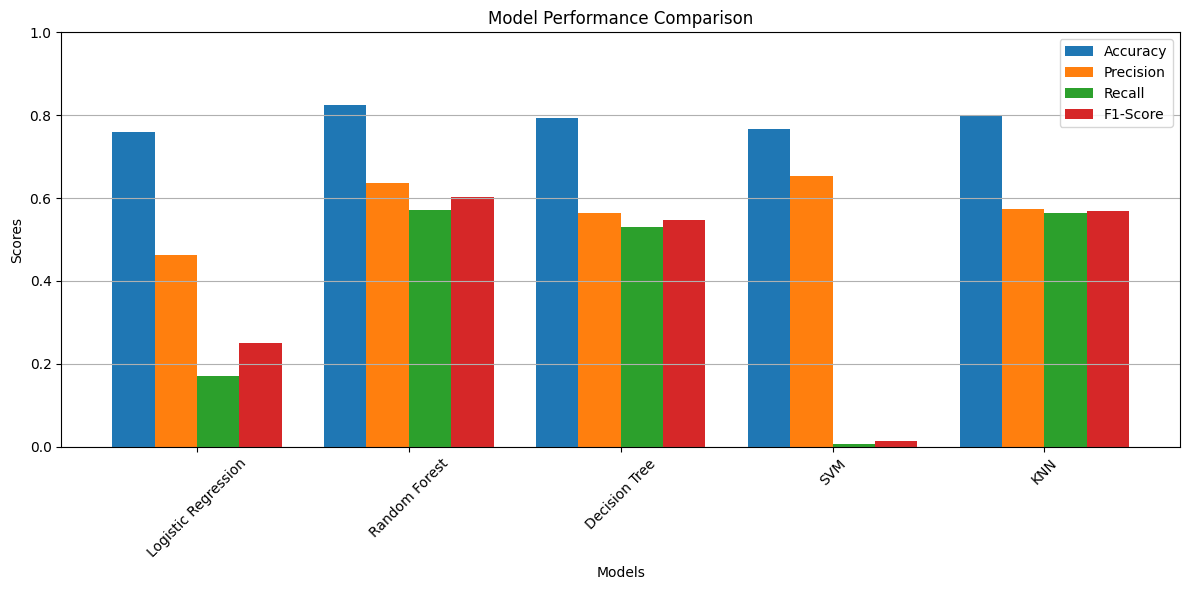

In [44]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [r['Model'] for r in results]
accuracy_scores = [r['Accuracy'] for r in results]
precision_scores = [r['Precision'] for r in results]
recall_scores = [r['Recall'] for r in results]
f1_scores = [r['F1-Score'] for r in results]

# --- Plot 1: Accuracy Bar Chart ---
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='lime')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
plt.bar(x - 0.5*width, precision_scores, width, label='Precision')
plt.bar(x + 0.5*width, recall_scores, width, label='Recall')
plt.bar(x + 1.5*width, f1_scores, width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [46]:
import joblib

# Pick the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Save model and encoders
joblib.dump(best_model, 'model_selected_features.pkl')
joblib.dump(encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [47]:

model = joblib.load('model_selected_features.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Example input: age, education, occupation, workclass, marital-status, sex, hours-per-week
input_raw = {
    'age': 65,
    'education': 'Bachelors',
    'occupation': 'Exec-managerial',
    'workclass': 'Private',
    'marital-status': 'Married-civ-spouse',
    'sex': 'Male',
    'hours-per-week': 50
}

# Encode input
input_encoded = [
    input_raw['age'],
    label_encoders['education'].transform([input_raw['education']])[0],
    label_encoders['occupation'].transform([input_raw['occupation']])[0],
    label_encoders['workclass'].transform([input_raw['workclass']])[0],
    label_encoders['marital-status'].transform([input_raw['marital-status']])[0],
    label_encoders['gender'].transform([input_raw['sex']])[0],
    input_raw['hours-per-week']
]

input_df = pd.DataFrame([input_encoded], columns=X.columns)

# Predict
prediction = model.predict(input_df)[0]
predicted_label = label_encoders['income'].inverse_transform([prediction])[0]

print("Predicted Income:", predicted_label)


Predicted Income: >50K


In [37]:
model.n_features_in_


7